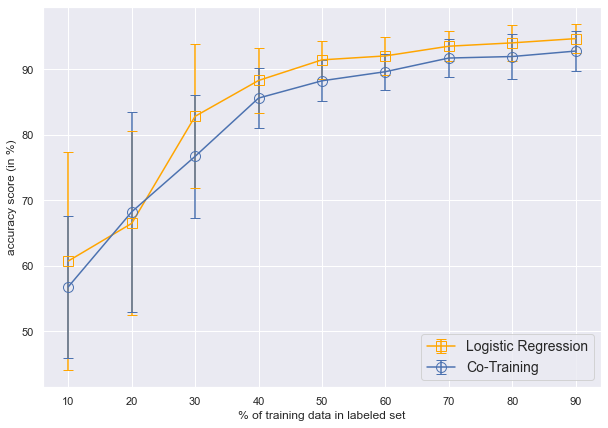

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



m_lr = [0.6074074074074074, 0.6648148148148147, 0.8282407407407406, 0.8828703703703704, 0.9143518518518521, 
        0.9203703703703706 ,0.9351851851851853, 0.9402777777777779, 0.9467592592592592]
s_lr = [0.16631650458753858, 0.14047245384083618, 0.10969291685533052, 0.04962781574905296, 0.02926204276492681,
       0.028598972613852785, 0.023240556292613207, 0.02707047019637725, 0.022275206895776674]
m_co = [0.5680555555555555, 0.6824074074074074, 0.7671296296296295, 0.8560185185185185, 0.8824074074074074,
        0.8962962962962964, 0.9171296296296297, 0.9194444444444445, 0.9277777777777778]
s_co = [0.10854581094036901, 0.15279461186716586, 0.09361816290250549, 0.04521657607243917, 0.031139206890370807, 0.027560881603957803,
       0.028459986832043857, 0.03478081476109805, 0.03023116243947131]
plt.figure(figsize=(10, 7))
plt.errorbar(y=np.array(m_lr)*100, x=(np.arange(9)+1)*10, yerr=np.array(s_lr)*100, marker="s", c="orange", capsize=5, markersize=10, mfc='none', label='Logistic Regression')
plt.errorbar(y=np.array(m_co)*100, x=(np.arange(9)+1)*10, yerr=np.array(s_co)*100, marker="o", c="b", capsize=5, markersize=10, mfc='none', label='Co-Training')
plt.xlabel("% of training data in labeled set")
plt.ylabel("accuracy score (in %)")
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 1
%aimport linear_models

np.set_printoptions(suppress=True)

np.set_printoptions(precision=3)

data = pd.read_csv("../../Datasets/Spambase/spambase.data", header=None).dropna()
y = data.pop(57).values.astype(int)
X = data.values.astype('float32')
X = normalize(X, norm='l2', axis=0)
np.unique(y, return_counts=True), len(y)

((array([0, 1]), array([2788, 1813])), 4601)

In [ ]:
from sklearn.model_selection import train_test_split

ids_train = []
ids_test = []

for i in range(20):
    id_train, id_test = train_test_split(np.arange(len(y)), test_size=.3)
    ids_train.append(id_train)
    ids_test.append(id_test)

In [4]:
for i in range(20):
    print(np.unique(y[ids_train[i][:10]], return_counts=True))

(array([0, 1]), array([4, 6]))
(array([0, 1]), array([7, 3]))
(array([0, 1]), array([3, 7]))
(array([0, 1]), array([6, 4]))
(array([0, 1]), array([3, 7]))
(array([0, 1]), array([7, 3]))
(array([0, 1]), array([9, 1]))
(array([0, 1]), array([7, 3]))
(array([0]), array([10]))
(array([0, 1]), array([7, 3]))
(array([0, 1]), array([7, 3]))
(array([0, 1]), array([6, 4]))
(array([0, 1]), array([5, 5]))
(array([0, 1]), array([5, 5]))
(array([0, 1]), array([8, 2]))
(array([0, 1]), array([6, 4]))
(array([0, 1]), array([6, 4]))
(array([0, 1]), array([7, 3]))
(array([0, 1]), array([5, 5]))
(array([0, 1]), array([4, 6]))


# Save 20 random split indexes

In [2]:
from data_gen import *
from sklearn.model_selection import train_test_split


for i in range(20):
    print('save split : ', i)
    id_split, id_test = train_test_split(np.arange(len(y)), test_size=.33)
    id_l, id_u = train_test_split(id_split, train_size=50, random_state=2020)
    Datasets.save_obj(id_test, 'SPAM_test_'+str(i))
    Datasets.save_obj(id_l, 'SPAM_l_'+str(i))
    Datasets.save_obj(id_u, 'SPAM_u_'+str(i))

save split :  0
save split :  1
save split :  2
save split :  3
save split :  4
save split :  5
save split :  6
save split :  7
save split :  8
save split :  9
save split :  10
save split :  11
save split :  12
save split :  13
save split :  14
save split :  15
save split :  16
save split :  17
save split :  18
save split :  19


In [7]:
for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    print(np.unique(y[id_l], return_counts=True)) 

(array([0, 1]), array([24, 26]))
(array([0, 1]), array([27, 23]))
(array([0, 1]), array([26, 24]))
(array([0, 1]), array([29, 21]))
(array([0, 1]), array([32, 18]))
(array([0, 1]), array([27, 23]))
(array([0, 1]), array([27, 23]))
(array([0, 1]), array([36, 14]))
(array([0, 1]), array([31, 19]))
(array([0, 1]), array([30, 20]))
(array([0, 1]), array([28, 22]))
(array([0, 1]), array([31, 19]))
(array([0, 1]), array([36, 14]))
(array([0, 1]), array([24, 26]))
(array([0, 1]), array([29, 21]))
(array([0, 1]), array([27, 23]))
(array([0, 1]), array([38, 12]))
(array([0, 1]), array([28, 22]))
(array([0, 1]), array([28, 22]))
(array([0, 1]), array([31, 19]))


In [3]:
def show_grid(g):
    for r in g:
        for c in r:
            print(c, end=' ')
        print()

# Giant step baby step pseudo labeling in LK with filtering out X_l and X_u

In [61]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in [1]:
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(thresh='max', verbose=True, X_test=X[id_test,], y_test=y[id_test])
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    print(LK.score(X[id_test,], y[id_test]), len(LK.H), LK.T) 

step :  10 scores :  [1.   1.   1.   1.   0.96]
|Xl|= 338 , |Xu|= 2744 , pseudo-labeled set (size, accuracy, balance) : 288 0.9236111111111112
pseudo-labeled set ratio :  (array([0, 1]), array([144, 144]))
training set (accuracy, ratio) :  0.9349112426035503 (array([0, 1]), array([171, 167]))
**** Score in test set ****
--> LK score :  0.6905859117840685
--> Maj_vote score :  0.6905859117840685
--> Mrg_vote score :  0.6905859117840685
--> WMrg_vote score :  0.6905859117840685
--> Score per halfspace :  [0.6905859117840685]
step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    0.988]
|Xl|= 358 , |Xu|= 2724 , pseudo-labeled set (size, accuracy, balance) : 20 1.0
pseudo-labeled set ratio :  (array([0, 1]), array([10, 10]))
training set (accuracy, ratio) :  0.9385474860335196 (array([0, 1]), array([181, 177]))
**** Score in test set ***

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    0.998 0.998 0.998 0.998
 0.998 0.997 0.997 0.992 0.985]
== No threshold in Xl ==
|Xl|= 676 , |Xu|= 2406 , pseudo-labeled set (size, accuracy, balance) : 20 1.0
pseudo-labeled set ratio :  (array([0, 1]), array([10, 10]))
training set (accuracy, ratio) :  0.9630177514792899 (array([0, 1]), array([340, 336]))
**** Score in test set ****
--> LK score :  0.6971691902567478
--> Maj_vote score :  0.761026991441738
--> Mrg_vote score :  0.7590520078999342
--> WMrg_vote score :  0.7590520078999342
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.75181

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.997 0.995 0.99  0.983]
== No threshold in Xl ==
|Xl|= 824 , |Xu|= 2258 , pseudo-labeled set (size, accuracy, balance) : 22 1.0
pseudo-labeled set ratio :  (array([0, 1]), array([11, 11]))
training set (accuracy, ratio) :  0.9563106796116505 (array([0, 1]), array([414, 410]))
**** Score in test set ****
--> LK score :  0.7037524687294272
--> Maj_vote score :  0.7439104674127716
--> Mrg_vote score :  0.7485187623436471
--> WMrg_vote score :  0.7504937458854509
--> Score per halfspace :  [0.6905859117840685, 0.7781435154

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    0.997 0.997 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.998 0.998 0.998 0.997 0.989 0.985]
== No threshold in Xl ==
|Xl|= 962 , |Xu|= 2120 , pseudo-labeled set (size, accuracy, balance) : 20 1.0
pseudo-labeled set ratio :  (array([0, 1]), array([10, 10]))
training set (accuracy, ratio) :  0.9604989604989606 (array([0, 1]), array([483, 479]))
**** Score in test set ****
--> LK score :  0.7195523370638578
--> Maj_vote score :  0.7379855167873601
--> Mrg_vote score :  0.7412771560236998
--> WMrg_vote sco

--> LK score :  0.7294272547728768
--> Maj_vote score :  0.7346938775510204
--> Mrg_vote score :  0.7373271889400922
--> WMrg_vote score :  0.7406188281764319
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.7518104015799868, 0.7557603686635944, 0.7577353522053983, 0.7340355497037525, 0.7241606319947334, 0.7340355497037525, 0.7320605661619487, 0.7340355497037525, 0.7386438446346281, 0.7314022383146808, 0.7287689269256089, 0.728110599078341, 0.7314022383146808, 0.7221856484529295, 0.7261356155365372, 0.7254772876892692, 0.7346938775510204, 0.727452271231073, 0.7294272547728768, 0.7254772876892692, 0.7333772218564846, 0.727452271231073, 0.6945358788676761]
step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    0.996 0.996 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0

--> LK score :  0.7307439104674127
--> Maj_vote score :  0.7327188940092166
--> Mrg_vote score :  0.7373271889400922
--> WMrg_vote score :  0.7399605003291639
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.7518104015799868, 0.7557603686635944, 0.7577353522053983, 0.7340355497037525, 0.7241606319947334, 0.7340355497037525, 0.7320605661619487, 0.7340355497037525, 0.7386438446346281, 0.7314022383146808, 0.7287689269256089, 0.728110599078341, 0.7314022383146808, 0.7221856484529295, 0.7261356155365372, 0.7254772876892692, 0.7346938775510204, 0.727452271231073, 0.7294272547728768, 0.7254772876892692, 0.7333772218564846, 0.727452271231073, 0.6945358788676761, 0.7261356155365372, 0.7267939433838051, 0.7287689269256089, 0.7215273206056616, 0.7432521395655036]
step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.996
 0.996 0.996 0.996 0.996 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.997 0.995 0.994 0.991]
== No threshold in Xl ==
|Xl|= 1298 , |Xu|= 1784 , pseudo-labeled set (size, accuracy, balance) : 20 0.85
pseudo-labeled set ratio :  (array([0, 1]), array([10, 10]))
training set (accuracy, ratio) :  0.95223

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    0.995 0.995 0.995 0.995 0.996 0.996
 0.996 0.996 0.996 0.996 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.997 0.998
 0.998 0.998 0.998 0.998 0.997 0.997 0.996 0.995 0.995 0.995 0.995 0.995
 0.993 0.993 0.993 0.99 ]
== No threshold in Xl ==
|Xl|= 1452 , |Xu|= 1630 , pseudo-labeled set (size, accuracy, balance) : 88 0.9545454545454546
pseudo-labeled set ratio :  (arra

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    0.995 0.995 0.995 0.995 0.996 0.996
 0.996 0.996 0.996 0.996 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.997 0.997 0.997 0.996 0.996 0.996 0.994 0.994 0.994 0.994 0.994
 0.994 0.994 0.994 0.993 0.993 0.993 0.993 0.988]
== No threshold in Xl ==
|Xl|= 1544 , |Xu|= 1538 , pseud

--> LK score :  0.727452271231073
--> Maj_vote score :  0.7254772876892692
--> Mrg_vote score :  0.728110599078341
--> WMrg_vote score :  0.7373271889400922
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.7518104015799868, 0.7557603686635944, 0.7577353522053983, 0.7340355497037525, 0.7241606319947334, 0.7340355497037525, 0.7320605661619487, 0.7340355497037525, 0.7386438446346281, 0.7314022383146808, 0.7287689269256089, 0.728110599078341, 0.7314022383146808, 0.7221856484529295, 0.7261356155365372, 0.7254772876892692, 0.7346938775510204, 0.727452271231073, 0.7294272547728768, 0.7254772876892692, 0.7333772218564846, 0.727452271231073, 0.6945358788676761, 0.7261356155365372, 0.7267939433838051, 0.7287689269256089, 0.7215273206056616, 0.7432521395655036, 0.7261356155365372, 0.717577353522054, 0.7182356813693219, 0.7241606319947334, 0.7294272547728768, 0.7261356155365372, 0.7320605661619487,

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    0.994 0.995 0.995 0.995 0.995 0.996 0.996
 0.996 0.996 0.996 0.996 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.997 0.997 0.996 0.997 0.997
 0.997 0.995 0.995 0.995 0.995 0.995 0.994 0.993 0.993 0.994 0.994 0.994
 0.994 0.994 0.993 0.993 0.993 0.

--> LK score :  0.7063857801184991
--> Maj_vote score :  0.7241606319947334
--> Mrg_vote score :  0.7241606319947334
--> WMrg_vote score :  0.7353522053982884
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.7518104015799868, 0.7557603686635944, 0.7577353522053983, 0.7340355497037525, 0.7241606319947334, 0.7340355497037525, 0.7320605661619487, 0.7340355497037525, 0.7386438446346281, 0.7314022383146808, 0.7287689269256089, 0.728110599078341, 0.7314022383146808, 0.7221856484529295, 0.7261356155365372, 0.7254772876892692, 0.7346938775510204, 0.727452271231073, 0.7294272547728768, 0.7254772876892692, 0.7333772218564846, 0.727452271231073, 0.6945358788676761, 0.7261356155365372, 0.7267939433838051, 0.7287689269256089, 0.7215273206056616, 0.7432521395655036, 0.7261356155365372, 0.717577353522054, 0.7182356813693219, 0.7241606319947334, 0.7294272547728768, 0.7261356155365372, 0.732060566161948

--> LK score :  0.7083607636603029
--> Maj_vote score :  0.7235023041474654
--> Mrg_vote score :  0.7235023041474654
--> WMrg_vote score :  0.7353522053982884
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.7518104015799868, 0.7557603686635944, 0.7577353522053983, 0.7340355497037525, 0.7241606319947334, 0.7340355497037525, 0.7320605661619487, 0.7340355497037525, 0.7386438446346281, 0.7314022383146808, 0.7287689269256089, 0.728110599078341, 0.7314022383146808, 0.7221856484529295, 0.7261356155365372, 0.7254772876892692, 0.7346938775510204, 0.727452271231073, 0.7294272547728768, 0.7254772876892692, 0.7333772218564846, 0.727452271231073, 0.6945358788676761, 0.7261356155365372, 0.7267939433838051, 0.7287689269256089, 0.7215273206056616, 0.7432521395655036, 0.7261356155365372, 0.717577353522054, 0.7182356813693219, 0.7241606319947334, 0.7294272547728768, 0.7261356155365372, 0.732060566161948

--> LK score :  0.7024358130348913
--> Maj_vote score :  0.7235023041474654
--> Mrg_vote score :  0.7195523370638578
--> WMrg_vote score :  0.7346938775510204
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.7518104015799868, 0.7557603686635944, 0.7577353522053983, 0.7340355497037525, 0.7241606319947334, 0.7340355497037525, 0.7320605661619487, 0.7340355497037525, 0.7386438446346281, 0.7314022383146808, 0.7287689269256089, 0.728110599078341, 0.7314022383146808, 0.7221856484529295, 0.7261356155365372, 0.7254772876892692, 0.7346938775510204, 0.727452271231073, 0.7294272547728768, 0.7254772876892692, 0.7333772218564846, 0.727452271231073, 0.6945358788676761, 0.7261356155365372, 0.7267939433838051, 0.7287689269256089, 0.7215273206056616, 0.7432521395655036, 0.7261356155365372, 0.717577353522054, 0.7182356813693219, 0.7241606319947334, 0.7294272547728768, 0.7261356155365372, 0.732060566161948

--> LK score :  0.6978275181040158
--> Maj_vote score :  0.7215273206056616
--> Mrg_vote score :  0.7188940092165899
--> WMrg_vote score :  0.7188940092165899
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.7518104015799868, 0.7557603686635944, 0.7577353522053983, 0.7340355497037525, 0.7241606319947334, 0.7340355497037525, 0.7320605661619487, 0.7340355497037525, 0.7386438446346281, 0.7314022383146808, 0.7287689269256089, 0.728110599078341, 0.7314022383146808, 0.7221856484529295, 0.7261356155365372, 0.7254772876892692, 0.7346938775510204, 0.727452271231073, 0.7294272547728768, 0.7254772876892692, 0.7333772218564846, 0.727452271231073, 0.6945358788676761, 0.7261356155365372, 0.7267939433838051, 0.7287689269256089, 0.7215273206056616, 0.7432521395655036, 0.7261356155365372, 0.717577353522054, 0.7182356813693219, 0.7241606319947334, 0.7294272547728768, 0.7261356155365372, 0.732060566161948

--> LK score :  0.6978275181040158
--> Maj_vote score :  0.7215273206056616
--> Mrg_vote score :  0.7188940092165899
--> WMrg_vote score :  0.7188940092165899
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.7518104015799868, 0.7557603686635944, 0.7577353522053983, 0.7340355497037525, 0.7241606319947334, 0.7340355497037525, 0.7320605661619487, 0.7340355497037525, 0.7386438446346281, 0.7314022383146808, 0.7287689269256089, 0.728110599078341, 0.7314022383146808, 0.7221856484529295, 0.7261356155365372, 0.7254772876892692, 0.7346938775510204, 0.727452271231073, 0.7294272547728768, 0.7254772876892692, 0.7333772218564846, 0.727452271231073, 0.6945358788676761, 0.7261356155365372, 0.7267939433838051, 0.7287689269256089, 0.7215273206056616, 0.7432521395655036, 0.7261356155365372, 0.717577353522054, 0.7182356813693219, 0.7241606319947334, 0.7294272547728768, 0.7261356155365372, 0.732060566161948

--> LK score :  0.6998025016458196
--> Maj_vote score :  0.7208689927583937
--> Mrg_vote score :  0.7202106649111257
--> WMrg_vote score :  0.7195523370638578
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.7518104015799868, 0.7557603686635944, 0.7577353522053983, 0.7340355497037525, 0.7241606319947334, 0.7340355497037525, 0.7320605661619487, 0.7340355497037525, 0.7386438446346281, 0.7314022383146808, 0.7287689269256089, 0.728110599078341, 0.7314022383146808, 0.7221856484529295, 0.7261356155365372, 0.7254772876892692, 0.7346938775510204, 0.727452271231073, 0.7294272547728768, 0.7254772876892692, 0.7333772218564846, 0.727452271231073, 0.6945358788676761, 0.7261356155365372, 0.7267939433838051, 0.7287689269256089, 0.7215273206056616, 0.7432521395655036, 0.7261356155365372, 0.717577353522054, 0.7182356813693219, 0.7241606319947334, 0.7294272547728768, 0.7261356155365372, 0.732060566161948

--> LK score :  0.7017774851876234
--> Maj_vote score :  0.7208689927583937
--> Mrg_vote score :  0.7215273206056616
--> WMrg_vote score :  0.7202106649111257
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.7518104015799868, 0.7557603686635944, 0.7577353522053983, 0.7340355497037525, 0.7241606319947334, 0.7340355497037525, 0.7320605661619487, 0.7340355497037525, 0.7386438446346281, 0.7314022383146808, 0.7287689269256089, 0.728110599078341, 0.7314022383146808, 0.7221856484529295, 0.7261356155365372, 0.7254772876892692, 0.7346938775510204, 0.727452271231073, 0.7294272547728768, 0.7254772876892692, 0.7333772218564846, 0.727452271231073, 0.6945358788676761, 0.7261356155365372, 0.7267939433838051, 0.7287689269256089, 0.7215273206056616, 0.7432521395655036, 0.7261356155365372, 0.717577353522054, 0.7182356813693219, 0.7241606319947334, 0.7294272547728768, 0.7261356155365372, 0.732060566161948

--> LK score :  0.7004608294930875
--> Maj_vote score :  0.7202106649111257
--> Mrg_vote score :  0.7221856484529295
--> WMrg_vote score :  0.7202106649111257
--> Score per halfspace :  [0.6905859117840685, 0.7781435154707044, 0.7774851876234364, 0.7682685977616853, 0.7590520078999342, 0.7636603028308098, 0.7518104015799868, 0.7557603686635944, 0.7577353522053983, 0.7340355497037525, 0.7241606319947334, 0.7340355497037525, 0.7320605661619487, 0.7340355497037525, 0.7386438446346281, 0.7314022383146808, 0.7287689269256089, 0.728110599078341, 0.7314022383146808, 0.7221856484529295, 0.7261356155365372, 0.7254772876892692, 0.7346938775510204, 0.727452271231073, 0.7294272547728768, 0.7254772876892692, 0.7333772218564846, 0.727452271231073, 0.6945358788676761, 0.7261356155365372, 0.7267939433838051, 0.7287689269256089, 0.7215273206056616, 0.7432521395655036, 0.7261356155365372, 0.717577353522054, 0.7182356813693219, 0.7241606319947334, 0.7294272547728768, 0.7261356155365372, 0.732060566161948

step :  10 scores :  [0.9   0.95  0.967 0.975 0.98  0.983 0.986 0.988 0.989 0.99  0.991 0.992
 0.992 0.993 0.993 0.994 0.994 0.994 0.995 0.995 0.995 0.995 0.996 0.996
 0.996 0.996 0.996 0.996 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.998 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.998 0.998

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    0.997 0.997 0.997
 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.996 0.996 0.996 0.996 0.996 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.999 0.999 0.998 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.996 0.995 0.995 0.993]
== No threshold in Xl ==
|Xl|= 1576 , |Xu

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    0.996 0.996 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.996 0.996 0.996 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.999 0.999 0.999 0.999 0.999 0.999 0.998 0.998 0.998 0.998 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.996
 0.996 0.996 0.996 0.996 0.994]
== N

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.999 0.999 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.

KeyboardInterrupt: 

In [60]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(1):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(thresh='max', verbose=True)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    print(LK.score(X[id_test,], y[id_test]), len(LK.H), LK.T) 

step :  10 scores :  [1.   1.   1.   1.   0.94]
|Xl|= 404 , |Xu|= 2678 , pseudo-labeled set (size, accuracy, balance) : 354 0.9067796610169492
pseudo-labeled set ratio :  (array([0, 1]), array([177, 177]))
training set (accuracy, ratio) :  0.9183168316831684 (array([0, 1]), array([201, 203]))
step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 0.997 0.997 0.995 0.983]
|Xl|= 424 , |Xu|= 2658 , pseudo-labeled set (size, accuracy, balance) : 20 1.0
pseudo-labeled set ratio :  (array([0, 1]), array([10, 10]))
training set (accuracy, ratio) :  0.9221698113207547 (array([0, 1]), array([211, 213]))
step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.   

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    0.999 0.999 0.996 0.99  0.986]
|Xl|= 862 , |Xu|= 2220 , pseudo-labeled set (size, accuracy, balance) : 32 0.90625
pseudo-labeled set ratio :  (array([0, 1]), array([16, 16]))
training set (accuracy, ratio) :  0.9501160092807425 (array([0, 1]), array([430, 432]))
step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1. 

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.999 0.999
 0.999 0.999 0.999 0.999 0.998 0.998 0.998 0.998 0.997 0.994 0.991]
== No threshold in Xl ==
|Xl|= 1094 , |Xu|= 1988 , pseudo-labeled set (size, accuracy, balance) : 20 0.9
pseudo-labeled set ratio :  (array([0, 1]), array([10, 10]))
training set (accuracy, ratio) :  0.9561243144424132 (array([0, 1]), array([546, 548]))
step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.998 0.998 0.998 0.998 0.998 0.994 0.991]
== No threshold in Xl ==
|Xl|= 1372 , |Xu|= 1710 , pseudo-labeled set (size, accuracy, balance) : 88 0.9545454545454546
pseudo-labeled set ratio :  (array([0, 1]), array([44, 44]))
training set (accuracy, ratio) :  0.956997

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.997 0.997 0.997 0.995 0.992]
== No threshold in Xl ==
|Xl|= 1546 , |Xu|= 1536 , pseudo-labeled set (

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.998 0.998 0.998 0.998 0.998
 0.998 0.999 0.999 0.999 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.998 0.998
 0.998 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.998 0.998 0.998 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998 0.998

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.998 0.998 0.998 0.998
 0.998 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999 0.999
 0.999 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    0.998 0.998 0.998 0.998 0.998 0.996 0.996 0.996 0.997 0.997 0.997
 0.997 0.995 0.995 0.995 0.995 0.995 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.997 0.997 0.995 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.995 0.995 0.996 0.996 0.994 0.994 0.993 0.99  0.988 0.987]
== No threshold in Xl ==
|Xl|= 1218 , |Xu|= 814 , pseudo-labeled set (size, accuracy, balance) : 26 0.8461538461538461
pseudo-labeled set ratio :  (array([0, 1]), array([13, 13]))
training set (accuracy, ratio) :  0.8866995073891626 (array([0, 1]), array([835, 383])

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    0.998 0.998 0.998 0.998 0.998 0.996 0.996 0.996
 0.996 0.996 0.996 0.994 0.994 0.994 0.995 0.995 0.995 0.995 0.995 0.995
 0.995 0.995 0.995 0.995 0.995 0.995 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.995 0.995 0.995 0.995 0.995 0.995 0.995
 0.995 0.994 0.991 0.989 0.987 0.986]
== No threshold in Xl ==
|Xl|= 1404 , |Xu|= 628 , pseudo-labeled set (size, accuracy, balance) : 20 0.8
pseudo-labeled set ratio :  (array([0, 1]),

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.998
 0.998 0.998 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.997 0.997 0.995
 0.995 0.995 0.995 0.995 0.995 0.995 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.995 0.995 0.995 0.995 0.995 0.995 0.994 0.993 0.99  0.988
 0.987]
== No threshold in Xl ==
|Xl|= 

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    0.997 0.998 0.998 0.998 0.995 0.995 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.997 0.997 0.997 0.997 0.997 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.996 0.996 0.996 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.

step :  10 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.998 0.998 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.996 0.996 0.996 0.996 0.996
 0.996 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.997
 0.997 0.997 0.997 0.997 0.997 0.997 0.997 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996 0.996
 0.996 0.996 0.996 0.996 0.996 0.996 0.

In [48]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(1):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(thresh='max', verbose=True)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    print(LK.score(X[id_test,], y[id_test]), len(LK.H), LK.T) 

step :  20 scores :  [1. 1.]
|Xl|= 986 , |Xu|= 2096 , pseudo-labeled set (size, accuracy, balance) : 936 0.9241452991452992
pseudo-labeled set ratio :  (array([0, 1]), array([468, 468]))
training set (accuracy, ratio) :  0.9279918864097363 (array([0, 1]), array([492, 494]))
step :  20 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.998 0.998
 0.991]
|Xl|= 1030 , |Xu|= 2052 , pseudo-labeled set (size, accuracy, balance) : 44 1.0
pseudo-labeled set ratio :  (array([0, 1]), array([22, 22]))
training set (accuracy, ratio) :  0.9310679611650485 (array([0, 1]), array([514, 516]))
step :  20 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.  

In [ ]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(1):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(thresh='rand', verbose=True)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    print(LK.score(X[id_test,], y[id_test]), len(LK.H), LK.T) 

In [51]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in [0, 1, 2, 3]:
    print('====== Split ',i,' ======')
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=2, frac=5, learning_rate=.1, leakage=.01, thresh='max', verbose=True, smote=False)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    #print(LK.score(X[id_test,], y[id_test]), LK.score(X[id_test,], y[id_test], method='mrg_vote')) 

====== Split  0  ======
window :  5 scores :  [1.    1.    1.    1.    1.    1.    1.    0.975 0.978 0.94 ]
|Xl|= 2221 , |Xu|= 861 , pseudo-labeled set (size, accuracy, balance) : 2171 0.9138645785352372
pseudo-labeled set ratio :  (array([0., 1.]), array([1003, 1168]))
training set (accuracy, ratio) :  0.9158036920306168 (array([0., 1.]), array([1027, 1194]))
====== Split  1  ======
window :  5 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    0.933 0.9  ]
|Xl|= 2490 , |Xu|= 592 , pseudo-labeled set (size, accuracy, balance) : 2440 0.7889344262295082
pseudo-labeled set ratio :  (array([0., 1.]), array([1491,  949]))
training set (accuracy, ratio) :  0.7931726907630522 (array([0., 1.]), array([1518,  972]))
====== Split  2  ======
window :  5 scores :  [1.   1.   1.   1.   1.   1.   1.   1.   1.   0.94]
|Xl|= 2823 , |Xu|= 259 , pseudo-labeled set (size, accuracy, balance) : 2773 0.857194374323837
pseudo-labeled set ratio :  (array([0., 1.]), array([1581, 1192]))
training set (

In [59]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in [0, 1, 2, 3]:
    print('====== Split ',i,' ======')
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=3, frac=10, learning_rate=.1, leakage=.01, thresh='max', verbose=True, smote=False)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    #print(LK.score(X[id_test,], y[id_test]), LK.score(X[id_test,], y[id_test], method='mrg_vote')) 

====== Split  0  ======
window :  10 scores :  [1.   1.   1.   1.   0.96]
|Xl|= 351 , |Xu|= 2731 , pseudo-labeled set (size, accuracy, balance) : 301 0.9800664451827242
pseudo-labeled set ratio :  (array([0., 1.]), array([180, 121]))
training set (accuracy, ratio) :  0.9829059829059829 (array([0., 1.]), array([204, 147]))
====== Split  1  ======
window :  10 scores :  [1.   1.   1.   1.   0.92]
|Xl|= 500 , |Xu|= 2582 , pseudo-labeled set (size, accuracy, balance) : 450 0.8933333333333333
pseudo-labeled set ratio :  (array([0., 1.]), array([260, 190]))
training set (accuracy, ratio) :  0.904 (array([0., 1.]), array([287, 213]))
====== Split  2  ======
window :  10 scores :  [1.   1.   1.   1.   0.94]
|Xl|= 425 , |Xu|= 2657 , pseudo-labeled set (size, accuracy, balance) : 375 0.9813333333333333
pseudo-labeled set ratio :  (array([0., 1.]), array([280,  95]))
training set (accuracy, ratio) :  0.9835294117647059 (array([0., 1.]), array([306, 119]))
====== Split  3  ======
window :  10 scor

# Labeled data provided by one LTF

In [13]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_all = np.concatenate((id_l, id_u))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = Halfspaces(epochs=5000, leakage=.1, thresh='rand')
    LK.fit(X[id_all,], y[id_all])
    print(LK.score(X[id_test,], y[id_test]))

0.9163923633969717
0.9163923633969717
0.9137590520079
0.9170506912442397
0.9111257406188282
0.9183673469387755
0.9328505595786701
0.9249506254114549
0.9203423304805793
0.9229756418696511
0.9150757077024358
0.9091507570770243
0.9150757077024358
0.9144173798551679
0.9190256747860435
0.9203423304805793
0.9157340355497038
0.9223173140223832
0.9157340355497038
0.9216589861751152


In [14]:
stats = [0.9163923633969717, 0.9163923633969717, 0.9137590520079, 0.9170506912442397, 0.9111257406188282, 0.9183673469387755, 0.9328505595786701, 0.9249506254114549, 0.9203423304805793, 0.9229756418696511, 0.9150757077024358, 0.9091507570770243, 0.9150757077024358, 0.9144173798551679, 0.9190256747860435, 0.9203423304805793, 0.9157340355497038, 0.9223173140223832, 0.9157340355497038, 0.9216589861751152]
len(stats), np.mean(stats), np.std(stats)

(20, 0.9181369321922317, 0.0051344296753043)

In [78]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=3, learning_rate=.1, leakage=.01, thresh='max', verbose=True, smote=False)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])

|Xl|= 3082 , |Xu|= 0 , pseudo-labeled set (size, accuracy, balance) : 3032 0.8271767810026385
|Xl|= 3082 , |Xu|= 0 , pseudo-labeled set (size, accuracy, balance) : 3032 0.7523087071240105
|Xl|= 3082 , |Xu|= 0 , pseudo-labeled set (size, accuracy, balance) : 3032 0.8133245382585752
|Xl|= 3082 , |Xu|= 0 , pseudo-labeled set (size, accuracy, balance) : 3032 0.7348284960422163
|Xl|= 3082 , |Xu|= 0 , pseudo-labeled set (size, accuracy, balance) : 3032 0.7925461741424802
|Xl|= 3082 , |Xu|= 0 , pseudo-labeled set (size, accuracy, balance) : 3032 0.7935356200527705
|Xl|= 3082 , |Xu|= 0 , pseudo-labeled set (size, accuracy, balance) : 3032 0.8093667546174143
|Xl|= 3082 , |Xu|= 0 , pseudo-labeled set (size, accuracy, balance) : 3032 0.8301451187335093
|Xl|= 3082 , |Xu|= 0 , pseudo-labeled set (size, accuracy, balance) : 3032 0.8222295514511874
|Xl|= 3082 , |Xu|= 0 , pseudo-labeled set (size, accuracy, balance) : 3032 0.8354221635883905
|Xl|= 3082 , |Xu|= 0 , pseudo-labeled set (size, accuracy, b

In [4]:
stats = np.array([0.8271767810026385, 0.7523087071240105, 0.8133245382585752, 0.7348284960422163, 0.7925461741424802, 0.7935356200527705, 0.8093667546174143, 0.8301451187335093, 0.8222295514511874, 0.8354221635883905, 0.7727572559366754, 0.7922163588390502, 0.8007915567282322, 0.7424142480211082, 0.7447229551451188, 0.7275725593667546, 0.808047493403694, 0.7687994722955145, 0.7974934036939314, 0.8027704485488126])
print(len(stats), np.mean(stats), np.std(stats))

20 0.7884234828496042 0.032460176862110716


In [14]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

L = []
S = []
for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=3, learning_rate=.1, leakage=.01, thresh='rand', verbose=False, smote=False)
    l, s = LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    L.append(l)
    S.append(s)
    print(l, s)
print(np.mean(L), np.mean(S))

1382 0.9551374819102749
1224 0.8619281045751634
1404 0.9430199430199431
1556 0.8451156812339332
1012 0.9426877470355731
1148 0.9538327526132404
1664 0.9393028846153846
1226 0.9159869494290375
1514 0.9260237780713342
1132 0.946113074204947
1300 0.9207692307692308
1492 0.8867292225201072
1642 0.9007308160779537
1286 0.9051321928460342
1392 0.8527298850574713
1542 0.8638132295719845
1606 0.9103362391033624
1452 0.890495867768595
1550 0.9019354838709678
1392 0.9130747126436781
1395.8 0.9087447638469108


In [12]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

L = []
S = []
for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=3, learning_rate=.1, leakage=.1, thresh='rand', verbose=False, smote=False)
    l, s = LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    L.append(l)
    S.append(s)
    print(l, s)
print(np.mean(L), np.mean(S))

1358 0.9528718703976435
1548 0.915374677002584
1676 0.9486873508353222
1516 0.899736147757256
1162 0.9432013769363167
1304 0.9532208588957055
1492 0.9517426273458445
872 0.9002293577981652
1550 0.9296774193548387
1318 0.9415781487101669
1568 0.9477040816326531
1590 0.9226415094339623
904 0.9480088495575221
1314 0.9010654490106544
1384 0.8966763005780347
1520 0.9072368421052631
1600 0.928125
1216 0.9111842105263158
1356 0.9144542772861357
1454 0.936726272352132
1385.1 0.9275071313758259


In [13]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

L = []
S = []
for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=3, learning_rate=.1, leakage=.2, thresh='rand', verbose=False, smote=False)
    l, s = LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    L.append(l)
    S.append(s)
    print(l, s)
print(np.mean(L), np.mean(S))

1206 0.9519071310116086
1482 0.9385964912280702
1572 0.9535623409669212
1196 0.9381270903010034
1114 0.9443447037701975
1500 0.9553333333333334
1252 0.9536741214057508
960 0.9197916666666667
1492 0.935656836461126
1444 0.953601108033241
1478 0.9546684709066305
1396 0.9383954154727794
716 0.9483240223463687
1104 0.8994565217391305
1542 0.9332036316472114
1548 0.9218346253229974
1418 0.9358251057827927
1314 0.9360730593607306
1046 0.9445506692160612
1674 0.9330943847072879
1322.7 0.9395010364839955


In [16]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

L = []
S = []
for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=1, learning_rate=.1, leakage=.3, thresh='rand', verbose=False, smote=False)
    l, s = LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    L.append(l)
    S.append(s)
    print(l, s)
print(np.mean(L), np.mean(S))

914 0.9398249452954048
1478 0.9133964817320703
1310 0.9541984732824428
432 0.9606481481481481
1038 0.9527938342967245
1056 0.9554924242424242
1372 0.9300291545189504
924 0.9036796536796536
1034 0.9187620889748549
1512 0.9265873015873016
1160 0.9387931034482758
1154 0.9428076256499134
190 0.9526315789473684
844 0.9004739336492891
1222 0.9108019639934534
868 0.9274193548387096
1724 0.935614849187935
1660 0.922289156626506
1138 0.9209138840070299
1526 0.927916120576671
1127.8 0.9317537038341565


In [20]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

for leak in [.01, .1, .2, .3, .4, .5]:
    for rt in [.1, .01]:
        for ep in [1, 2, 3, 4, 5]:
            L = []
            S = []
            for i in range(20):
                id_l = Datasets.load_obj('SPAM_l_'+str(i))
                id_u = Datasets.load_obj('SPAM_u_'+str(i))
                id_test = Datasets.load_obj('SPAM_test_'+str(i))
                LK = SSL_Halfspaces(epochs=ep, learning_rate=rt, leakage=leak, thresh='rand', verbose=False, smote=False)
                l, s = LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
                L.append(l)
                S.append(s)
            print('leakage : ', leak, ' epochs : ', ep, 'lear_rate : ', rt, np.mean(L), np.mean(S))

leakage :  0.01  epochs :  1 lear_rate :  0.1 1191.7 0.8947006492795563
leakage :  0.01  epochs :  2 lear_rate :  0.1 1264.4 0.9092304039806491
leakage :  0.01  epochs :  3 lear_rate :  0.1 1395.8 0.9087447638469108
leakage :  0.01  epochs :  4 lear_rate :  0.1 1423.4 0.9089861292749134
leakage :  0.01  epochs :  5 lear_rate :  0.1 1403.1 0.9113878501183587
leakage :  0.01  epochs :  1 lear_rate :  0.01 1191.7 0.8947006492795563
leakage :  0.01  epochs :  2 lear_rate :  0.01 1264.4 0.9092304039806491
leakage :  0.01  epochs :  3 lear_rate :  0.01 1395.8 0.9087447638469108
leakage :  0.01  epochs :  4 lear_rate :  0.01 1423.4 0.9089861292749134
leakage :  0.01  epochs :  5 lear_rate :  0.01 1403.1 0.9113878501183587
leakage :  0.1  epochs :  1 lear_rate :  0.1 1265.4 0.91404462941214
leakage :  0.1  epochs :  2 lear_rate :  0.1 1295.1 0.9247139842928481
leakage :  0.1  epochs :  3 lear_rate :  0.1 1385.1 0.9275071313758259
leakage :  0.1  epochs :  4 lear_rate :  0.1 1402.1 0.9291520271

In [153]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(1):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=5, learning_rate=.1, leakage=.1, thresh='rand', verbose=True, smote=False)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])

step :  20 scores :  [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   0.94]
Pseudo labeled data  (array([0, 1]), array([1265, 1530]))
|Xl|= 2845 , |Xu|= 237 , pseudo-labeled set (size, accuracy) : 2795 0.845438282647585


NameError: name 'k' is not defined

In [152]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(1):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=10, learning_rate=.1, leakage=.1, thresh='rand', verbose=True, smote=False)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])

step :  20 scores :  [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   0.96]
Pseudo labeled data  (array([0, 1]), array([1236, 1568]))
|Xl|= 2854 , |Xu|= 228 , pseudo-labeled set (size, accuracy) : 2804 0.8366619115549215
training set (accuracy, ratio) :  0.8395234758234057 (array([0, 1]), array([1260, 1594]))
step :  20 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    0.999 0.996 0.991 0.991 0.987 0.986 0.961]
Pseudo labeled data  (array([0, 1]), array([ 1, 19]))
|Xl|= 2874 , |Xu|= 208 , pseudo-labeled set (size, accuracy) : 20 0.2
training set (accuracy, ratio) :  0.8350730688935282 (array([0, 1]), array([1261, 1613]))
step :  20 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.999 0.996
 0.991 0.988 0.981 0.974 0.973 0.969 0.968 0.964]
no confidence threshol
Pseudo labeled data  (array([0, 1]), array([ 3, 18]))
|Xl|= 2895 , |Xu|= 187 , pseudo-labeled set (size, accuracy) : 21 0

In [22]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in [0, 1]:
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=1, frac=10, learning_rate=.1, leakage=.1, thresh='rand')
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    print(LK.score(X[id_test,], y[id_test]), LK.score(X[id_test,], y[id_test], method='mrg_vote')) 

0.8235681369321922 0.8314680710994075
0.8005266622778143 0.7992100065832785


In [25]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in [0, 1]:
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=2, frac=10, learning_rate=.01, leakage=.1, thresh='rand')
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    print(LK.score(X[id_test,], y[id_test]), LK.score(X[id_test,], y[id_test], method='mrg_vote')) 

0.8275181040157998 0.8314680710994075
0.7794601711652402 0.7840684660961159


In [28]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

err_LK = []
err_mrg = []

for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=1, frac=10, learning_rate=.1, leakage=.1, thresh='rand')
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    err_LK.append(LK.score(X[id_test,], y[id_test]))
    err_mrg.append(LK.score(X[id_test,], y[id_test], method='mrg_vote'))
    print(err_LK[-1], err_mrg[-1]) 
print('LK : ', np.mean(err_LK), np.std(err_LK))
print('Margin : ', np.mean(err_mrg), np.std(err_mrg))

0.8235681369321922 0.8314680710994075
0.8005266622778143 0.7992100065832785
0.8018433179723502 0.8294930875576036
0.7656352863726136 0.7801184990125082
0.825543120473996 0.8268597761685319
0.7544437129690585 0.7873601053324556
0.8031599736668861 0.804476629361422
0.8163265306122449 0.8347597103357473
0.8084265964450297 0.8268597761685319
0.7906517445687953 0.793285055957867
0.7919684002633312 0.793285055957867
0.7873601053324556 0.7853851217906518
0.8110599078341014 0.8281764318630678
0.7886767610269915 0.793285055957867
0.7682685977616853 0.7853851217906518
0.7992100065832785 0.8196181698485846
0.7913100724160632 0.804476629361422
0.8051349572086899 0.8183015141540487
0.7959183673469388 0.793285055957867
0.7788018433179723 0.7959183673469388
LK :  0.7953917050691244 0.01806699188626909
Margin :  0.8065503620803159 0.01787002414449489


In [32]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

err_LK = []
err_mrg = []

for i in range(3):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=1, frac=20, learning_rate=.1, leakage=.1, thresh='max')
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    err_LK.append(LK.score(X[id_test,], y[id_test]))
    err_mrg.append(LK.score(X[id_test,], y[id_test], method='mrg_vote'))
    print(err_LK[-1], err_mrg[-1]) 
print('LK : ', np.mean(err_LK), np.std(err_LK))
print('Margin : ', np.mean(err_mrg), np.std(err_mrg))

0.8354180381830152 0.825543120473996
0.7702435813034891 0.7702435813034891
0.8130348913759052 0.8130348913759052
LK :  0.8062321702874699 0.027038678691097103
Margin :  0.8029405310511302 0.023677441315767236


In [33]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

err_LK = []
err_mrg = []

for i in range(3):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=1, frac=20, learning_rate=.1, leakage=.1, thresh='max', smote=True)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    err_LK.append(LK.score(X[id_test,], y[id_test]))
    err_mrg.append(LK.score(X[id_test,], y[id_test], method='mrg_vote'))
    print(err_LK[-1], err_mrg[-1]) 
print('LK : ', np.mean(err_LK), np.std(err_LK))
print('Margin : ', np.mean(err_mrg), np.std(err_mrg))

0.8196181698485846 0.8222514812376563
0.7504937458854509 0.7583936800526663
0.8189598420013167 0.8189598420013167
LK :  0.7963572525784507 0.032431510228199886
Margin :  0.7998683344305464 0.02935778078623579


In [34]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

err_LK = []
err_mrg = []

for i in range(3):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=2, frac=20, learning_rate=.1, leakage=.1, thresh='max', smote=True)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    err_LK.append(LK.score(X[id_test,], y[id_test]))
    err_mrg.append(LK.score(X[id_test,], y[id_test], method='mrg_vote'))
    print(err_LK[-1], err_mrg[-1]) 
print('LK : ', np.mean(err_LK), np.std(err_LK))
print('Margin : ', np.mean(err_mrg), np.std(err_mrg))

0.826201448321264 0.8235681369321922
0.7590520078999342 0.7873601053324556
0.8248847926267281 0.8406846609611587
LK :  0.8033794162826421 0.03134881971196586
Margin :  0.8172043010752689 0.02222987274457594


In [35]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score

err_LK = []
err_mrg = []

for i in range(3):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=3, frac=20, learning_rate=.1, leakage=.1, thresh='max', smote=True)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    err_LK.append(LK.score(X[id_test,], y[id_test]))
    err_mrg.append(LK.score(X[id_test,], y[id_test], method='mrg_vote'))
    print(err_LK[-1], err_mrg[-1]) 
print('LK : ', np.mean(err_LK), np.std(err_LK))
print('Margin : ', np.mean(err_mrg), np.std(err_mrg))

0.8123765635286373 0.804476629361422
0.7853851217906518 0.7880184331797235
0.8308097432521395 0.8466096115865701
LK :  0.8095238095238096 0.018653913133511845
Margin :  0.8130348913759052 0.024673392325973896


In [23]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


for i in [0, 1]:
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=1, frac=30, learning_rate=.1, leakage=.1, thresh='rand')
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    print(LK.score(X[id_test,], y[id_test]), LK.score(X[id_test,], y[id_test], method='mrg_vote')) 

0.8268597761685319 0.8308097432521395
0.7689269256089533 0.7755102040816326


In [14]:
from data_gen import *
from linear_models import *
from sklearn.metrics import accuracy_score


err_LK = []

for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=1, frac=5, learning_rate=.1, leakage=.2)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])

window :  5 scores :  [1.    1.    1.    1.    1.    1.    1.    1.    0.978 0.9  ]
indices in scores :  0 4
pseudo_labeling indice :  44
|Xl|= 2631 , |Xu|= 451 , pseudo-labeled set (size, accuracy) : 2581 0.8337853545137544
(array([0., 1.]), array([1052, 1579])) 0.8285822881033827
window :  5 scores :  [1.    1.    1.    1.    1.    1.    1.    0.975 0.933 0.9  ]
indices in scores :  0 4
pseudo_labeling indice :  37
|Xl|= 2076 , |Xu|= 1006 , pseudo-labeled set (size, accuracy) : 2026 0.8519249753208292
(array([0., 1.]), array([1264,  812])) 0.8429672447013488
window :  5 scores :  [1.    1.    1.    1.    1.    1.    1.    0.975 0.956 0.86 ]
indices in scores :  0 4
pseudo_labeling indice :  35
|Xl|= 2096 , |Xu|= 986 , pseudo-labeled set (size, accuracy) : 2046 0.9232649071358748
(array([0., 1.]), array([1060, 1036])) 0.9155534351145038
window :  5 scores :  [1.    1.    0.933 0.95  0.96  0.933 0.914 0.9   0.889 0.82 ]
indices in scores :  0 4
pseudo_labeling indice :  14
|Xl|= 545 , 

In [28]:
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from self_learning import msla
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=1, frac=5, learning_rate=.1, leakage=.2)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])

|Xl|= 2483 , |Xu|= 451 , pseudo-labeled set (size, accuracy) : 2433 0.8261405672009864
|Xl|= 1961 , |Xu|= 1006 , pseudo-labeled set (size, accuracy) : 1911 0.8456305599162742
|Xl|= 1977 , |Xu|= 986 , pseudo-labeled set (size, accuracy) : 1927 0.9195640892579139
|Xl|= 383 , |Xu|= 2537 , pseudo-labeled set (size, accuracy) : 333 0.93993993993994
|Xl|= 772 , |Xu|= 2126 , pseudo-labeled set (size, accuracy) : 722 0.9445983379501385
|Xl|= 352 , |Xu|= 2295 , pseudo-labeled set (size, accuracy) : 302 0.9403973509933775
|Xl|= 1450 , |Xu|= 1430 , pseudo-labeled set (size, accuracy) : 1400 0.94
|Xl|= 1467 , |Xu|= 1412 , pseudo-labeled set (size, accuracy) : 1417 0.89484827099506
|Xl|= 1031 , |Xu|= 1919 , pseudo-labeled set (size, accuracy) : 981 0.9072375127420998
|Xl|= 2203 , |Xu|= 730 , pseudo-labeled set (size, accuracy) : 2153 0.8824895494658616
|Xl|= 1420 , |Xu|= 1578 , pseudo-labeled set (size, accuracy) : 1370 0.9445255474452555
|Xl|= 2078 , |Xu|= 919 , pseudo-labeled set (size, accuracy)

In [26]:
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from self_learning import msla
from linear_models import *
from sklearn.metrics import accuracy_score


for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    LK = SSL_Halfspaces(epochs=5, frac=5, learning_rate=.1, leakage=.2)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])

|Xl|= 2762 , |Xu|= 178 , pseudo-labeled set (size, accuracy) : 2712 0.8108407079646017
|Xl|= 2779 , |Xu|= 195 , pseudo-labeled set (size, accuracy) : 2729 0.8530597288384023
|Xl|= 2725 , |Xu|= 213 , pseudo-labeled set (size, accuracy) : 2675 0.874392523364486
|Xl|= 1487 , |Xu|= 1447 , pseudo-labeled set (size, accuracy) : 1437 0.9171885873347251
|Xl|= 1531 , |Xu|= 1356 , pseudo-labeled set (size, accuracy) : 1481 0.9351789331532748
|Xl|= 2091 , |Xu|= 813 , pseudo-labeled set (size, accuracy) : 2041 0.9010289073983342
|Xl|= 2281 , |Xu|= 640 , pseudo-labeled set (size, accuracy) : 2231 0.8758404303003138
|Xl|= 2114 , |Xu|= 811 , pseudo-labeled set (size, accuracy) : 2064 0.8982558139534884
|Xl|= 2717 , |Xu|= 229 , pseudo-labeled set (size, accuracy) : 2667 0.8597675290588677
|Xl|= 2302 , |Xu|= 715 , pseudo-labeled set (size, accuracy) : 2252 0.9129662522202486
|Xl|= 1715 , |Xu|= 1189 , pseudo-labeled set (size, accuracy) : 1665 0.9303303303303303
|Xl|= 2485 , |Xu|= 567 , pseudo-labeled s

In [8]:
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from self_learning import msla
from linear_models import *
from sklearn.metrics import accuracy_score


err_LK = []

for i in range(20):
    print('-- Split ', i, ' --')
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))

    LK = SSL_Halfspaces(epochs=1, frac=10)
    LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])
    err_LK.append(LK.score(X[id_test,], y[id_test]))
    print('accuracy score :', err_LK[-1])

print('Halfspaces LK : ', np.mean(err_LK), np.std(err_LK))

|Xl|= 2554 , |Xu|= 178 , pseudo-labeled set (size, accuracy) : 2504 0.797923322683706
|Xl|= 1254 , |Xu|= 176
|Xl|= 844 , |Xu|= 176
|Xl|= 374 , |Xu|= 169
|Xl|= 393 , |Xu|= 149 , pseudo-labeled set (size, accuracy) : 19 0.9473684210526315
|Xl|= 313 , |Xu|= 149
|Xl|= 253 , |Xu|= 148
|Xl|= 270 , |Xu|= 131 , pseudo-labeled set (size, accuracy) : 17 0.8235294117647058
|Xl|= 240 , |Xu|= 131
|Xl|= 80 , |Xu|= 127
|Xl|= 70 , |Xu|= 123
|Xl|= 82 , |Xu|= 103 , pseudo-labeled set (size, accuracy) : 12 0.3333333333333333
|Xl|= 52 , |Xu|= 102
|Xl|= 32 , |Xu|= 95
|Xl|= 43 , |Xu|= 77 , pseudo-labeled set (size, accuracy) : 11 0.2727272727272727
|Xl|= 32 , |Xu|= 77
|Xl|= 12 , |Xu|= 76
|Xl|= 2 , |Xu|= 75
accuracy score : 0.7794601711652402
Halfspaces LK :  0.7794601711652402 0.0


# Remove w^(k) after pseudo labeling and retrain without filtering out X_l

In [38]:
err_LK = []
LK = SSL_Halfspaces(epochs=1, frac=10)
LK.fit(X_l, y_l, X_u, y_u)
err_LK.append(LK.score(X_test, y_test))
    

print('Halfspaces LK : ', np.mean(err_LK), np.std(err_LK), len(LK.models), LK.trace_l, LK.trace_u)

|Xl|= 1675 , |Xu|= 1069 , pseudo-labeled set (size, accuracy) : 1625 0.9427692307692308
|Xl|= 1708 , |Xu|= 1035 , pseudo-labeled set (size, accuracy) : 33 0.9696969696969697
|Xl|= 1298 , |Xu|= 1030
|Xl|= 1380 , |Xu|= 948 , pseudo-labeled set (size, accuracy) : 82 0.8414634146341463
|Xl|= 490 , |Xu|= 947
|Xl|= 600 , |Xu|= 834 , pseudo-labeled set (size, accuracy) : 110 0.9363636363636364
|Xl|= 350 , |Xu|= 834
|Xl|= 369 , |Xu|= 815 , pseudo-labeled set (size, accuracy) : 19 0.8421052631578947
|Xl|= 189 , |Xu|= 808
|Xl|= 247 , |Xu|= 750 , pseudo-labeled set (size, accuracy) : 58 0.7241379310344828
|Xl|= 217 , |Xu|= 750
|Xl|= 356 , |Xu|= 611 , pseudo-labeled set (size, accuracy) : 139 0.7194244604316546
|Xl|= 296 , |Xu|= 611
|Xl|= 216 , |Xu|= 611
|Xl|= 270 , |Xu|= 557 , pseudo-labeled set (size, accuracy) : 54 0.7407407407407407
|Xl|= 287 , |Xu|= 540 , pseudo-labeled set (size, accuracy) : 17 0.5882352941176471
|Xl|= 137 , |Xu|= 540
|Xl|= 87 , |Xu|= 531
|Xl|= 109 , |Xu|= 501 , pseudo-label

In [39]:
LK.T

[0.074043185,
 0.028576659,
 0.05286718,
 0.011932225,
 0.018323723,
 0.027945947,
 0.013873162,
 0.008181955,
 0.0020026728,
 0.0022004265,
 0.012703171,
 0.008760502,
 0.0074166213,
 0.0061156624,
 0.004991336,
 0.002836268,
 0.009731691,
 0.0045103105,
 0.003846606,
 0.0024930905,
 0.0057829698,
 0.0010404356,
 0.0010715389,
 0.00047726274,
 0.00023625258,
 0.00018955836,
 1.2617655e-05]

In [40]:
LK.score(X_test, y_test, method='maj_vote')

0.7379855167873601

In [41]:
LK.score(X_test, y_test, method='mrg_vote')

0.8630678077682686

In [42]:
LK.score(X_test, y_test, method='w_mrg_vote')

0.8354180381830152

In [43]:
LK.score(X_test, y_test, method='per_W')

[0.8031599736668861,
 0.761685319289006,
 0.4930875576036866,
 0.684660961158657,
 0.6043449637919684,
 0.6017116524028966,
 0.6109282422646478,
 0.630678077682686,
 0.7946017116524029,
 0.7906517445687953,
 0.608953258722844,
 0.6175115207373272,
 0.6240947992100065,
 0.6280447662936142,
 0.6668861092824226,
 0.6583278472679395,
 0.5681369321922317,
 0.6603028308097433,
 0.662936142198815,
 0.7103357472021067,
 0.6260697827518104,
 0.6879526003949967,
 0.641211323238973,
 0.663594470046083,
 0.5608953258722844,
 0.4647794601711652,
 0.4930875576036866]

In [58]:
err_LK = []
LK = SSL_Halfspaces(epochs=1, frac=10)
LK.fit(X_l, y_l, X_u, y_u)
err_LK.append(LK.score(X_test, y_test))
    

print('Halfspaces LK : ', np.mean(err_LK), np.std(err_LK), len(LK.models), LK.trace_l, LK.trace_u)

Loss value :  -0.0004594987064047018
|Xl|= 1675 , |Xu|= 1069 , pseudo-labeled set (size, accuracy) : 1625 0.9427692307692308
Loss value :  -0.013826378044197092
|Xl|= 1708 , |Xu|= 1035 , pseudo-labeled set (size, accuracy) : 33 0.9696969696969697
Loss value :  -0.014614714964548072
|Xl|= 1298 , |Xu|= 1030
Loss value :  -0.010497890866142227
|Xl|= 1380 , |Xu|= 948 , pseudo-labeled set (size, accuracy) : 82 0.8414634146341463
Loss value :  -0.011123323898121509
|Xl|= 490 , |Xu|= 947
Loss value :  -0.006564997782252434
|Xl|= 600 , |Xu|= 834 , pseudo-labeled set (size, accuracy) : 110 0.9363636363636364
Loss value :  -0.010131549071302289
|Xl|= 350 , |Xu|= 834
Loss value :  -0.0023800820230677087
|Xl|= 369 , |Xu|= 815 , pseudo-labeled set (size, accuracy) : 19 0.8421052631578947
Loss value :  -0.002663288873163506
|Xl|= 189 , |Xu|= 808
Loss value :  -0.0011666873270148664
|Xl|= 247 , |Xu|= 750 , pseudo-labeled set (size, accuracy) : 58 0.7241379310344828
Loss value :  -0.002363512065392069

In [91]:
LK = SSL_Halfspaces(epochs=1, frac=10)
LK.fit(X_l, y_l, X_u, y_u)
print('Halfspaces LK : ', LK.score(X_test, y_test), len(LK.models), LK.trace_l, LK.trace_u)

Loss value :  -0.0004515200135210762
|Xl|= 1640 , |Xu|= 1097 , pseudo-labeled set (size, accuracy) : 1590 0.9421383647798742
Loss value :  -0.014843095564802065
|Xl|= 1674 , |Xu|= 1060 , pseudo-labeled set (size, accuracy) : 34 0.8529411764705882
Loss value :  -0.015812196984621538
|Xl|= 1314 , |Xu|= 1053
Loss value :  -0.011095378213556136
|Xl|= 1458 , |Xu|= 908 , pseudo-labeled set (size, accuracy) : 144 0.8541666666666666
Loss value :  -0.011908209085387846
|Xl|= 578 , |Xu|= 905
Loss value :  -0.006697992355555606
|Xl|= 615 , |Xu|= 868 , pseudo-labeled set (size, accuracy) : 37 0.8918918918918919
Loss value :  -0.007932111058853775
|Xl|= 405 , |Xu|= 868
Loss value :  -0.002300795306436393
|Xl|= 325 , |Xu|= 863
Loss value :  -0.0013367489711051278
|Xl|= 305 , |Xu|= 863
Loss value :  -0.0012496349342252303
|Xl|= 295 , |Xu|= 862
Loss value :  -0.0012486300784630812
|Xl|= 35 , |Xu|= 468
Loss value :  -0.0006182375059909516
|Xl|= 226 , |Xu|= 244 , pseudo-labeled set (size, accuracy) : 19

In [5]:
stats = np.array([0.8961713173264114, 0.9094743672939649, 0.8533419857235561, 0.8968202465931213, 0.8679428942245295, 0.8598312783906554, 0.900064892926671, 0.8718364698247891, 0.8737832576249189, 0.9136924075275795, 0.8335496430889033, 0.8990914990266061, 0.8526930564568462, 0.8569110966904607, 0.8780012978585334, 0.8737832576249189, 0.8238157040882543, 0.8831927319922128, 0.8614536015574302, 0.8718364698247891])
print(len(stats), np.mean(stats), np.std(stats))

20 0.8738643737832575 0.023438359200534695


In [9]:
from sklearn.svm import LinearSVC
from data_gen import *
from sklearn.metrics import accuracy_score

err_SVM = []


for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    clf = LinearSVC(random_state=2020)
    clf.fit(X[id_l,], y[id_l])
    err_SVM.append(clf.score(X[id_u,], y[id_u]))
print(len(err_SVM), np.mean(err_SVM), np.std(err_SVM))

20 0.633509234828496 0.042433350438049224


In [11]:
from sklearn.ensemble import RandomForestClassifier
from data_gen import *
from sklearn.metrics import accuracy_score

err_RF = []


for i in range(20):
    id_l = Datasets.load_obj('SPAM_l_'+str(i))
    id_u = Datasets.load_obj('SPAM_u_'+str(i))
    id_all = np.concatenate((id_l, id_u))
    id_test = Datasets.load_obj('SPAM_test_'+str(i))
    clf = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=-1, random_state=2020)
    clf.fit(X[id_all,], y[id_all])
    err_RF.append(clf.score(X[id_test,], y[id_test]))
print(len(err_RF), np.mean(err_RF), np.std(err_RF))

20 0.9507241606319947 0.00507072724162056


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


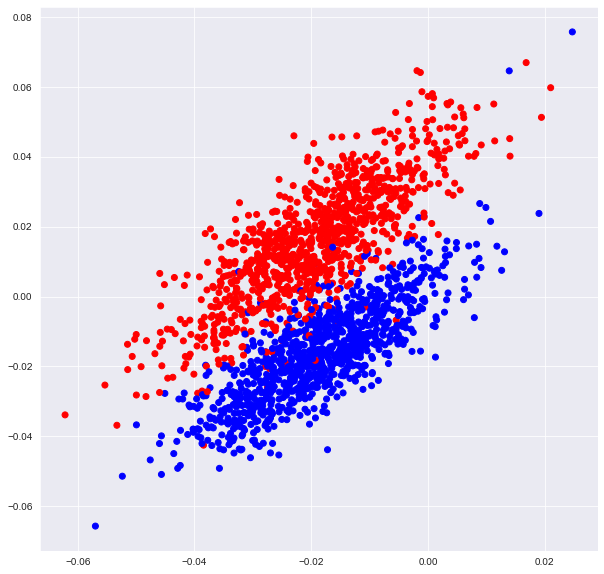

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_moons, make_classification
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split


%load_ext autoreload
%autoreload 1
%aimport linear_models

sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))
#X, y = make_moons(n_samples=2000, n_features=20, noise=.05)
X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0, n_clusters_per_class=1)
id_split, id_test = train_test_split(np.arange(len(y)), test_size=.33)
id_l, id_u = train_test_split(id_split, train_size=50, random_state=2020)
y = y.astype(int)
X = X.astype('float32')
X = normalize(X, norm='l2', axis=0)
color= ['red' if l == 0 else 'blue' for l in y]
plt.scatter(X[:,0], X[:,1], c=color)
plt.show()

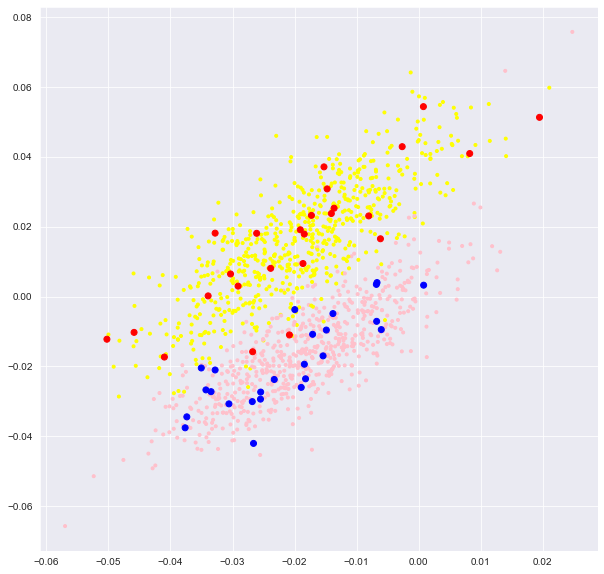

In [72]:
plt.figure(figsize=(10, 10))
color_u= ['yellow' if l == 0 else 'pink' for l in y[id_u]]
plt.scatter(X[id_u, 0], X[id_u, 1], c=color_u, marker='.')
color_l= ['red' if l == 0 else 'blue' for l in y[id_l]]
plt.scatter(X[id_l, 0], X[id_l, 1], c=color_l)
plt.show()

In [73]:
from linear_models import *
LTF_l = Halfspace()
LTF_l.fit(X[id_l], y[id_l])

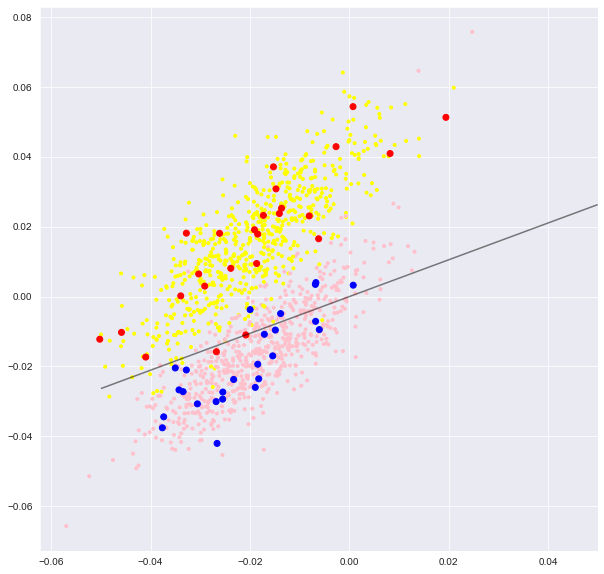

test error :  0.8606060606060606
overall error :  0.8615


In [74]:
import numpy as np
from sklearn.metrics import accuracy_score

plt.figure(figsize=(10, 10))
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(-0.05, 0.05, 30)
yy = np.linspace(-0.05, 0.05, 30)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)

for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = LTF_l(np.array([x1, x2], dtype='float32'))
    Z[i, j] = p


# plot decision boundary and margins
ax.contour(X1, X2, Z, colors='k', levels=[-.1, 0, .1], alpha=0.5, linestyles=['--', '-', '--'])
color_u= ['yellow' if l == 0 else 'pink' for l in y[id_u]]
plt.scatter(X[id_u, 0], X[id_u, 1], c=color_u, marker='.')
color_l= ['red' if l == 0 else 'blue' for l in y[id_l]]
plt.scatter(X[id_l, 0], X[id_l, 1], c=color_l)
plt.show()
print('test error : ', LTF_l.score(X[id_test,], y[id_test]))
print('overall error : ', LTF_l.score(X, y))

In [95]:
LK = SSL_Halfspaces(verbose=True, leakage=.1, learning_rate=.01, X_test=X[id_test,], y_test=y[id_test])
LK.fit(X[id_l,], y[id_l], X[id_u,], y[id_u])

step :  10 scores :  [1.    1.    1.    0.925 0.86 ]
|Xl|= 100 , |Xu|= 1240 , pseudo-labeled set (size, accuracy, balance) : 50 0.96
pseudo-labeled set ratio :  (array([0, 1]), array([25, 25]))
training set (accuracy, ratio) :  0.98 (array([0, 1]), array([50, 50]))
**** Score in test set ****
--> LK score :  0.8909090909090909
--> Maj_vote score :  0.8909090909090909
--> Mrg_vote score :  0.8909090909090909
--> WMrg_vote score :  0.8909090909090909
--> Score per halfspace :  [0.8909090909090909]
step :  10 scores :  [1.         1.         1.         1.         1.         1.
 1.         1.         0.96666667 0.92      ]
|Xl|= 208 , |Xu|= 1132 , pseudo-labeled set (size, accuracy, balance) : 108 1.0
pseudo-labeled set ratio :  (array([0, 1]), array([54, 54]))
training set (accuracy, ratio) :  0.9903846153846154 (array([0, 1]), array([104, 104]))
**** Score in test set ****
--> LK score :  0.8909090909090909
--> Maj_vote score :  0.8727272727272727
--> Mrg_vote score :  0.8757575757575757

In [96]:
print('Number of halfspaces', len(LK.H))
print('test error : ', LK.score(X[id_test,], y[id_test]))
print('overall error : ', LK.score(X, y))

Number of halfspaces 4
test error :  0.8909090909090909
overall error :  0.884


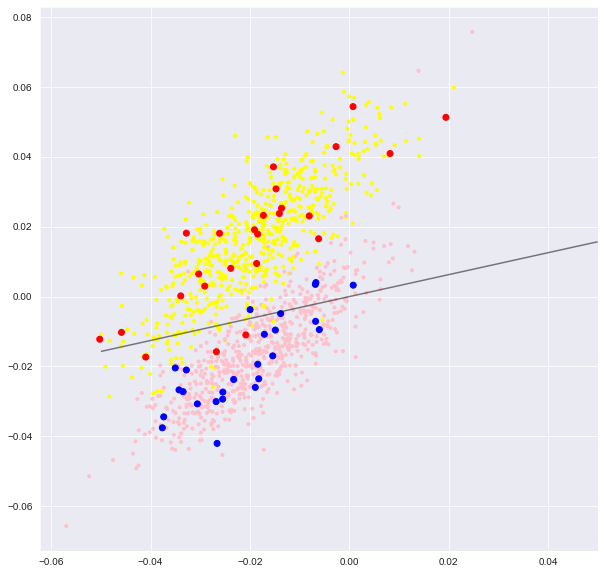

In [97]:
import numpy as np
from sklearn.metrics import accuracy_score

plt.figure(figsize=(10, 10))
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(-0.05, 0.05, 30)
yy = np.linspace(-0.05, 0.05, 30)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)

for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = LK.H[0](np.array([x1, x2], dtype='float32'))
    Z[i, j] = p


# plot decision boundary and margins
ax.contour(X1, X2, Z, colors='k', levels=[-.1, 0, .1], alpha=0.5, linestyles=['--', '-', '--'])
color_u= ['yellow' if l == 0 else 'pink' for l in y[id_u]]
plt.scatter(X[id_u, 0], X[id_u, 1], c=color_u, marker='.')
color_l= ['red' if l == 0 else 'blue' for l in y[id_l]]
plt.scatter(X[id_l, 0], X[id_l, 1], c=color_l)
plt.show()

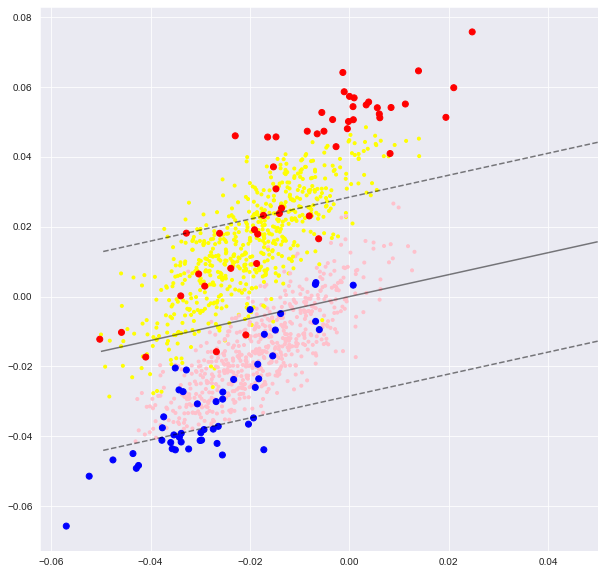

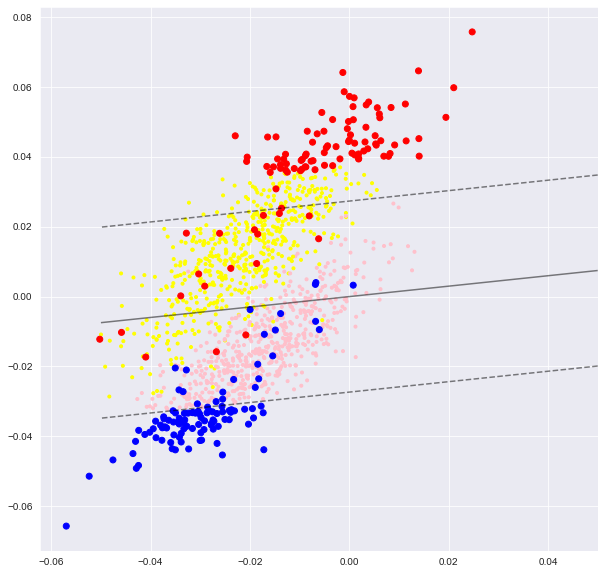

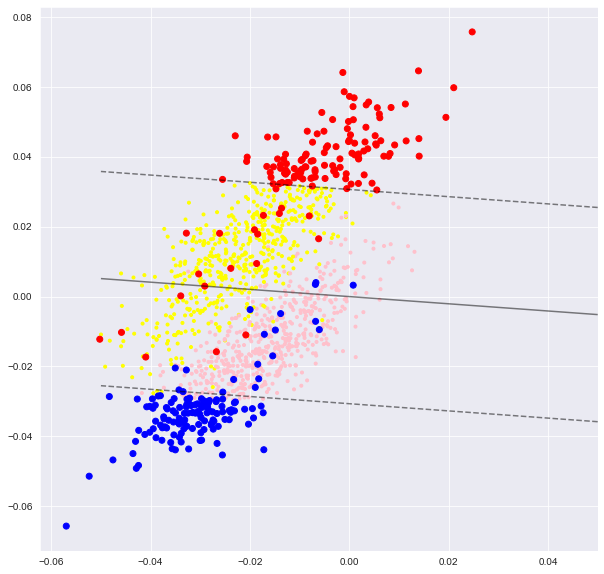

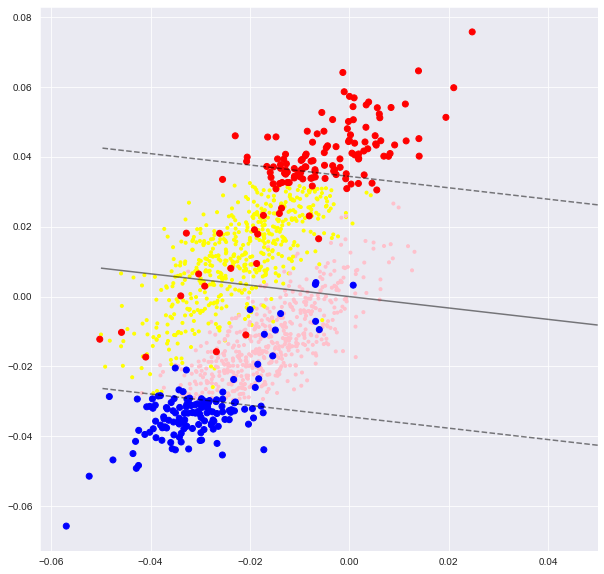

In [98]:
from sklearn.preprocessing import normalize
import numpy as np

for k in range(len(LK.H)):
    plt.figure(figsize=(10, 10))
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(-0.05, 0.05, 30)
    yy = np.linspace(-0.05, 0.05, 30)
    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)

    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = LK.H[k](np.array([x1, x2], dtype='float32'))
        Z[i, j] = p


    # plot decision boundary and margins
    ax.contour(X1, X2, Z, colors='k', levels=[-LK.T[k], 0, LK.T[k]], alpha=0.5, linestyles=['--', '-', '--'])
    color= ['red' if l == 0 else 'blue' for l in y]
    color_u= ['yellow' if l == 0 else 'pink' for l in y[id_u]]
    plt.scatter(X[id_u, 0], X[id_u, 1], c=color_u, marker='.')
    color_l= ['red' if l == 0 else 'blue' for l in LK.labeled_y[k]]
    plt.scatter(LK.labeled_X[k][:,0], LK.labeled_X[k][:,1], c=color_l)
    plt.show()